In [262]:
import OffsetArrays
using Plots
using Revise
using StatsBase
using ProgressMeter
using SparseArrays, LinearAlgebra, IndexedGraphs, Graphs
using Distributions
srcpath = "../src"
include("$srcpath/single_instance.jl")
#include("$srcpath/bp.jl")
#include("$srcpath/post_infer.jl")
#include("$srcpath/observables.jl")

nontrivial_conn (generic function with 1 method)

In [244]:
include("$srcpath/single_instance.jl")
T = 8
Ngraph = 40000 # size of the single instance graph
N = Ngraph
x = zeros(Int,Ngraph, T + 1) # a single epidemic trajectory
degree_dist = Dirac(3)
G = makeGraph(Ngraph,degree_dist)
γRange = LinRange(0.001,0.025,100) 
nconn = zeros(100)
λp = 1.0
@showprogress for st = 1:100
    sample!(x, G, λp, γRange[st])
    nconn[st] = S_subgraph(G,x)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


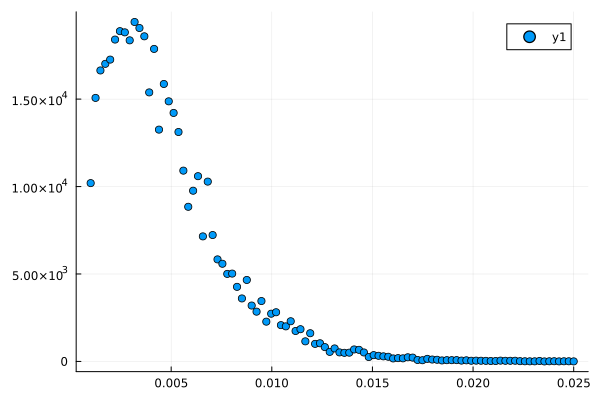

In [245]:
scatter(γRange,nconn)

In [229]:
using DelimitedFiles
open("./N=$(Ngraph)nconn.txt","w") do io
    writedlm(io,nconn) 
end

possible_zero_patients (generic function with 1 method)

In [266]:
T = 8
Ngraph = 4000000 # size of the single instance graph
N = Ngraph
x = zeros(Int,Ngraph, T + 1) # a single epidemic trajectory
degree_dist = Dirac(3)
G = makeGraph(Ngraph,degree_dist)
γRange = LinRange(0.001,0.025,100) 
n_zp = zeros(100)
@showprogress for st = 1:100
    sample!(x, G, λp, γRange[st])
    n_zp[st] = possible_zero_patients(G,x)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:09:21


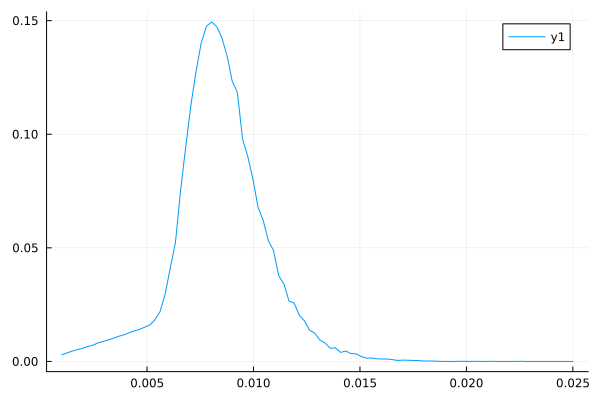

In [267]:
plot(γRange,n_zp ./ N)

In [268]:
using DelimitedFiles
open("./N=$(Ngraph)n_zp.txt","w") do io
    writedlm(io,n_zp./N) 
end